In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd
%cd /content/drive/MyDrive/Colab Notebooks
df= pd.read_csv('higher_ed_employee_salaries.csv')


/content/drive/MyDrive/Colab Notebooks


In [42]:
df

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...
934343,Danielle Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
934344,Danielle Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
934345,Kristen Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
934346,Danielle Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934348 entries, 0 to 934347
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             934348 non-null  object 
 1   School           934348 non-null  object 
 2   Job Description  907680 non-null  object 
 3   Department       873896 non-null  object 
 4   Earnings         924673 non-null  float64
 5   Year             934348 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 42.8+ MB


In [ ]:
df.describe()

In [40]:
df.dropna(inplace=True)

In [16]:
#Highest Student Counts in Schools
student_count = df.groupby('School')[['Name']].nunique()
student_count.sort_values('Name',ascending = False)

,Name
School,
The Ohio State University,127731
University of Toledo,20252
Kent State University,17149
Miami University,15280
University Of Cincinnati,15238
Ohio University,13883
Wright State University,12135
Bowling Green State University,8337
Youngstown State University,6833


In [18]:
#Avg Salaries Secured from Schools
avg_earn_scl = df.groupby('School')['Earnings'].mean()
avg_earn_scl.sort_values(ascending=False)

School
The Ohio State University         61318.960181
University Of Cincinnati          56195.946459
Cleveland State University        56151.806804
Ohio University                   55218.448567
Bowling Green State University    52098.559181
University of Toledo              51089.495305
Wright State University           50802.415859
Miami University                  47126.453988
Kent State University             44468.285752
University of Akron               41253.642497
Central State University          39036.842019
Shawnee State University          30332.294781
Youngstown State University       27265.279131
Name: Earnings, dtype: float64

In [ ]:
#Top Paying Departments
top_earn_dept= df.groupby('Department')['Earnings'].max()
top_earn_dept.sort_values(ascending=False).head(10)

Department
Athletics | Football                            8021376.56
Athletics Football                              5986348.94
Athletics                                       5951221.47
Athletics | Basketball Men                      3108721.18
Athletics | Administration                      2672800.02
Advancement Services                            2537527.11
Health Sciences Admin RU                        2307367.12
Internal Medicine                               1981634.52
Office of the CFO                               1885596.42
Business and Finance | Office of Investments    1826263.14
Name: Earnings, dtype: float64

In [19]:
#Example of using multiple fields in Groupby method
op_earn_scl_dept = df.groupby(['School','Department'])['Earnings'].max()
top_earn_scl_dept.sort_values(ascending=False).reset_index().head(10)

,School,Department,Earnings
0,The Ohio State University,Athletics | Football,8021376.56
1,University Of Cincinnati,Athletics Football,5986348.94
2,The Ohio State University,Athletics,5951221.47
3,The Ohio State University,Athletics | Basketball Men,3108721.18
4,The Ohio State University,Athletics | Administration,2672800.02
5,The Ohio State University,Advancement Services,2537527.11
6,The Ohio State University,Health Sciences Admin RU,2307367.12
7,The Ohio State University,Internal Medicine,1981634.52
8,The Ohio State University,Office of the CFO,1885596.42
9,The Ohio State University,Business and Finance | Office of Investments,1826263.14


In [35]:
#Top Schools with Pedatricians
peds = df[df['Department']=='Pediatrics']
peds['School'].value_counts()

School
The Ohio State University    4426
University of Toledo          332
Wright State University       243
Ohio University                 5
Name: count, dtype: int64

In [43]:
#Using lambda function to attach '$' in front of 'Earnings' content.
df['Earnings'] = df['Earnings'].apply(lambda x: f'${x}' )
df.head(20)

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,$2472.0,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,$48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,$22722.8,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,$170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",$3075.2,2012
5,Amanda Potter,The Ohio State University,Program Coordinator,WCA-Education,$48806.72,2013
6,Susan Marie Potter,The Ohio State University,Program Manager,College of Nursing,$65216.0,2013
7,Katrina Potter,Miami University,Personnel Technician,VP for Acad Affrs-Provost,$24324.14,2012
8,Pamela Lynn Potter,Bowling Green State University,Administrative Assistant 2,Center for Teaching & Learning,$51496.58,2012
9,Kimberly J Potter,The Ohio State University,Policy Anlyst/Compliance Offcr,Legal Affairs Administration,$20868.0,2015


In [44]:
#Removing '$' sign from 'Earning' column's content to perform aggragation based on the same column.
df['Earnings'] = df['Earnings'].str.replace('$','').astype(float)
top_earn_jd = df.groupby('Job Description')['Earnings'].max()
top_earn_jd.dropna(inplace=True)
top_earn_jd.head(20).sort_values(ascending=False)

Job Description
'Director of Energy Programs and Director of Human Capital    141658.10
0                                                              68750.00
2nd Asst Mens Baskball Coach                                   63357.50
2nd Asst Volleyball Coach                                      56918.06
1890 Post&Pre Award Admin                                      52908.76
1 Smstr Temp                                                   51704.71
1890 Research Administrator                                    51187.50
21st Century Community L                                       46255.00
1st Asst Softball Coach                                        44046.08
3 D Technician Sculpture                                       42200.00
3 D Technician                                                 24288.00
1 Smstr Temp - Univ College                                    22837.00
1 Smstr Temp, Sr Instr, Eng/Hum                                20300.00
1 Smstr Temp - Eng/Hum                          

In [87]:
#Getting a variety of aggragtion with custom column names using .agg() method with groupby
max_n_mean = df.groupby('School').agg(max_earn = ('Earnings','max'),mean_earn=('Earnings','mean'),headcount=("Name",'nunique'))
max_n_mean.head(20).sort_values(by='headcount',ascending=False)

,max_earn,mean_earn,headcount
School,,,
The Ohio State University,8021376.56,61318.960181,127731
University of Toledo,1230000.10,51089.495305,20252
Kent State University,499035.00,44468.285752,17149
Miami University,757017.28,47126.453988,15280
University Of Cincinnati,5986348.94,56195.946459,15238
Ohio University,753260.13,55218.448567,13883
Wright State University,827873.36,50802.415859,12135
Bowling Green State University,539437.50,52098.559181,8337
Youngstown State University,523880.48,27265.279131,6833


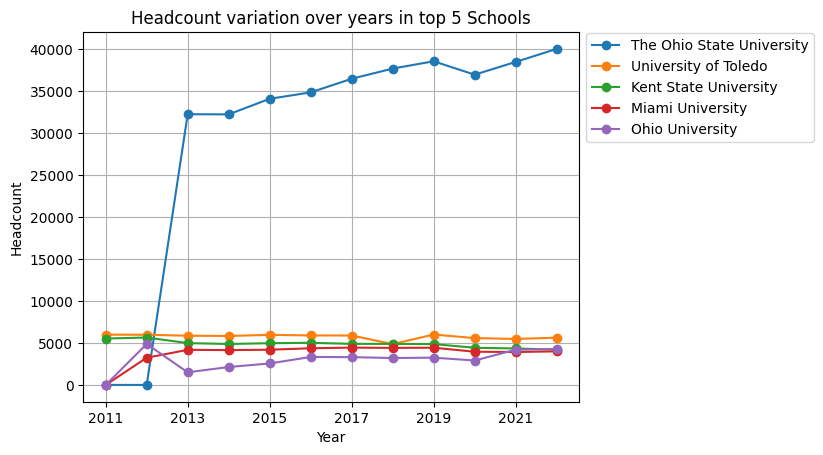

In [136]:
#Plotting of the variation in the headcount over the years for top 5 Schools
import matplotlib.pyplot as plt
pvt= df.pivot_table(index='School',columns='Year',values='Name',aggfunc='nunique',fill_value=0)
pvt['Total'] = pvt.sum(axis=1)
pvt_sorted = pvt.sort_values('Total',ascending=False).head(5)
del pvt_sorted['Total']
pvt_sorted.T.plot(marker='o', grid=True, title='Headcount variation over years in top 5 Schools')
plt.ylabel('Headcount')
plt.legend(loc='center left', bbox_to_anchor=(1,0.85))
plt.show()

In [95]:
#Merging two dataframes based on a column
top_scl_earn = df.groupby('School').agg(Earning=('Earnings',max))
top_scl_earn.sort_values('Earning', ascending=False).head(10)
top_earner = df[['Name','Earnings','School']].sort_values(by='Earnings', ascending = False).head(5)
top_earner
merged = df.merge(top_earner,on = "Name", how="inner")
merged

,Name,School_x,Job Description,Department,Earnings_x,Year,Earnings_y,School_y
0,Christopher A Holtmann,The Ohio State University,Head Coach-Major Sports,Athletics,5663248.58,2017,5663248.58,The Ohio State University
1,Christopher A Holtmann,The Ohio State University,Head Coach-Major Sports,Athletics,1410624.44,2018,5663248.58,The Ohio State University
2,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics | Football,8021376.56,2022,8021376.56,The Ohio State University
3,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics | Football,8021376.56,2022,5951221.47,The Ohio State University
4,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics,4948639.79,2020,8021376.56,The Ohio State University
5,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics,4948639.79,2020,5951221.47,The Ohio State University
6,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics,5951221.47,2021,8021376.56,The Ohio State University
7,Ryan Day,The Ohio State University,Head Coach-Major Sports,Athletics,5951221.47,2021,5951221.47,The Ohio State University
8,Thomas Tuberville,University Of Cincinnati,Head Coach Major Sports,Athletics Football,2341022.69,2015,5986348.94,University Of Cincinnati
9,Thomas Tuberville,University Of Cincinnati,Head Coach Major Sports,Athletics Football,5986348.94,2013,5986348.94,University Of Cincinnati


<Axes: xlabel='Year', ylabel='Salary'>

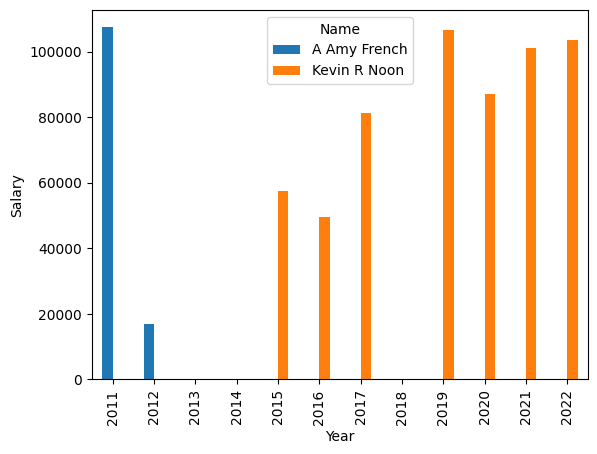

In [105]:
#Showing yearly increment comparison betweeen two individuals
increment = df.pivot_table(index='Year',columns='Name',values='Earnings', aggfunc='sum')
increment.loc[:,['A Amy French','Kevin R Noon']].plot.bar(ylabel='Salary')

In [109]:
#Analysisng only for Pediatrics Department
testdf = df[df.loc[:,'Department'].isin(['Pediatrics'])]
testdf = testdf[['Name','School','Department','Earnings']].set_index('Name')
testdf

,School,Department,Earnings
Name,,,
Carol Jean Potter,The Ohio State University,Pediatrics,22722.80
Carol Jean Potter,The Ohio State University,Pediatrics,28444.65
Carol Jean Potter,The Ohio State University,Pediatrics,49421.56
Carol Potter,The Ohio State University,Pediatrics,51060.36
Carol Jean Potter,The Ohio State University,Pediatrics,48353.20
...,...,...,...
Arielle Sheftall,The Ohio State University,Pediatrics,26079.60
Karen J Tenenblatt,The Ohio State University,Pediatrics,11540.34
Karen J Tenenblatt,The Ohio State University,Pediatrics,17245.67


In [110]:
#Removing The Ohio State University's data to get a picture for other schools using .qeury()
testdf.query("School != 'The Ohio State University'")

,School,Department,Earnings
Name,,,
Diane Ludwig,University of Toledo,Pediatrics,17490.19
J Joe Hoo,University of Toledo,Pediatrics,60535.81
Jermica L. Hood,Wright State University,Pediatrics,4706.00
Julie Harris,University of Toledo,Pediatrics,62289.65
Eileen Quinn,University of Toledo,Pediatrics,65494.02
...,...,...,...
John M. Pascoe,Wright State University,Pediatrics,207757.68
John M. Pascoe,Wright State University,Pediatrics,207757.68
John M. Pascoe,Wright State University,Pediatrics,205957.80


In [135]:
#Flagging individuals' salary as low and high using .where()
testdf = testdf.query("School != 'The Ohio State University'")
testdf['Earning_Level'] = testdf['Earnings'].where(testdf['Earnings']>testdf['Earnings'].mean(),'low')
testdf['Earning_Level'] = testdf['Earning_Level'].where(testdf['Earning_Level']=='low','high')
testdf.head(15)

,School,Department,Earnings,Earning_Level
Name,,,,
Diane Ludwig,University of Toledo,Pediatrics,17490.19,low
J Joe Hoo,University of Toledo,Pediatrics,60535.81,low
Jermica L. Hood,Wright State University,Pediatrics,4706.00,low
Julie Harris,University of Toledo,Pediatrics,62289.65,low
Eileen Quinn,University of Toledo,Pediatrics,65494.02,low
Merrilee Cox,Wright State University,Pediatrics,92434.80,high
Tiffany Akeman,University of Toledo,Pediatrics,2689.40,low
Tiffany Akeman,University of Toledo,Pediatrics,16000.43,low
Kathleen Lavrar,University of Toledo,Pediatrics,37940.59,low
